In [32]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn as sk
import sklearn.metrics as skl
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [33]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [34]:
#read data
data = pd.read_csv('/content/drive/MyDrive/Thesis code/dataset.csv',usecols = ['Gender','Current CGPA','Type of your University ?','What was the main reason behind your semester drop? ','Which Area do you live in?','Family Income monthly (put only numerical value, no need comma or any other symbol)','Internet facilities in your area ( Rate out of 5 )','Did you fail to complete your semester due to the Covid-19? (March 2020 - September 2021) '])
data.head(2)

,Gender,Current CGPA,Type of your University ?,Did you fail to complete your semester due to the Covid-19? (March 2020 - September 2021),What was the main reason behind your semester drop?,Which Area do you live in?,"Family Income monthly (put only numerical value, no need comma or any other symbol)",Internet facilities in your area ( Rate out of 5 )
0,Male,2.84,Public,No,No dropped,Urban,50000,4
1,Male,3.34,Public,Yes,Depression,Urban,8000,5


In [35]:
#column name change
data.rename(columns = {'Current CGPA':'Current_cgpa','Type of your University ?':'University_types',
                       'Did you fail to complete your semester due to the Covid-19? (March 2020 - September 2021) ':
                       'Drop_semester','What was the main reason behind your semester drop? ':'Reason',
                       'Which Area do you live in?':'Living_area',
                       'Family Income monthly (put only numerical value, no need comma or any other symbol)':
                       'Family_income','Internet facilities in your area ( Rate out of 5 )':'Internet_facilities'}, inplace = True)
data.head(2)

,Gender,Current_cgpa,University_types,Drop_semester,Reason,Living_area,Family_income,Internet_facilities
0,Male,2.84,Public,No,No dropped,Urban,50000,4
1,Male,3.34,Public,Yes,Depression,Urban,8000,5


In [36]:
data['Current_cgpa'] = data['Current_cgpa'].astype('float')
# data['Family_income'] = data['Current_cgpa'].astype('float')
array =[]
for income in  data['Family_income']:
  word=''  
  for char in income:
    if char != ',':
      word = word+char
  array.append(word)
a=np.array(array)
new_Income_data=pd.DataFrame(a,columns=['Family_income'])
data['Family_income']=new_Income_data

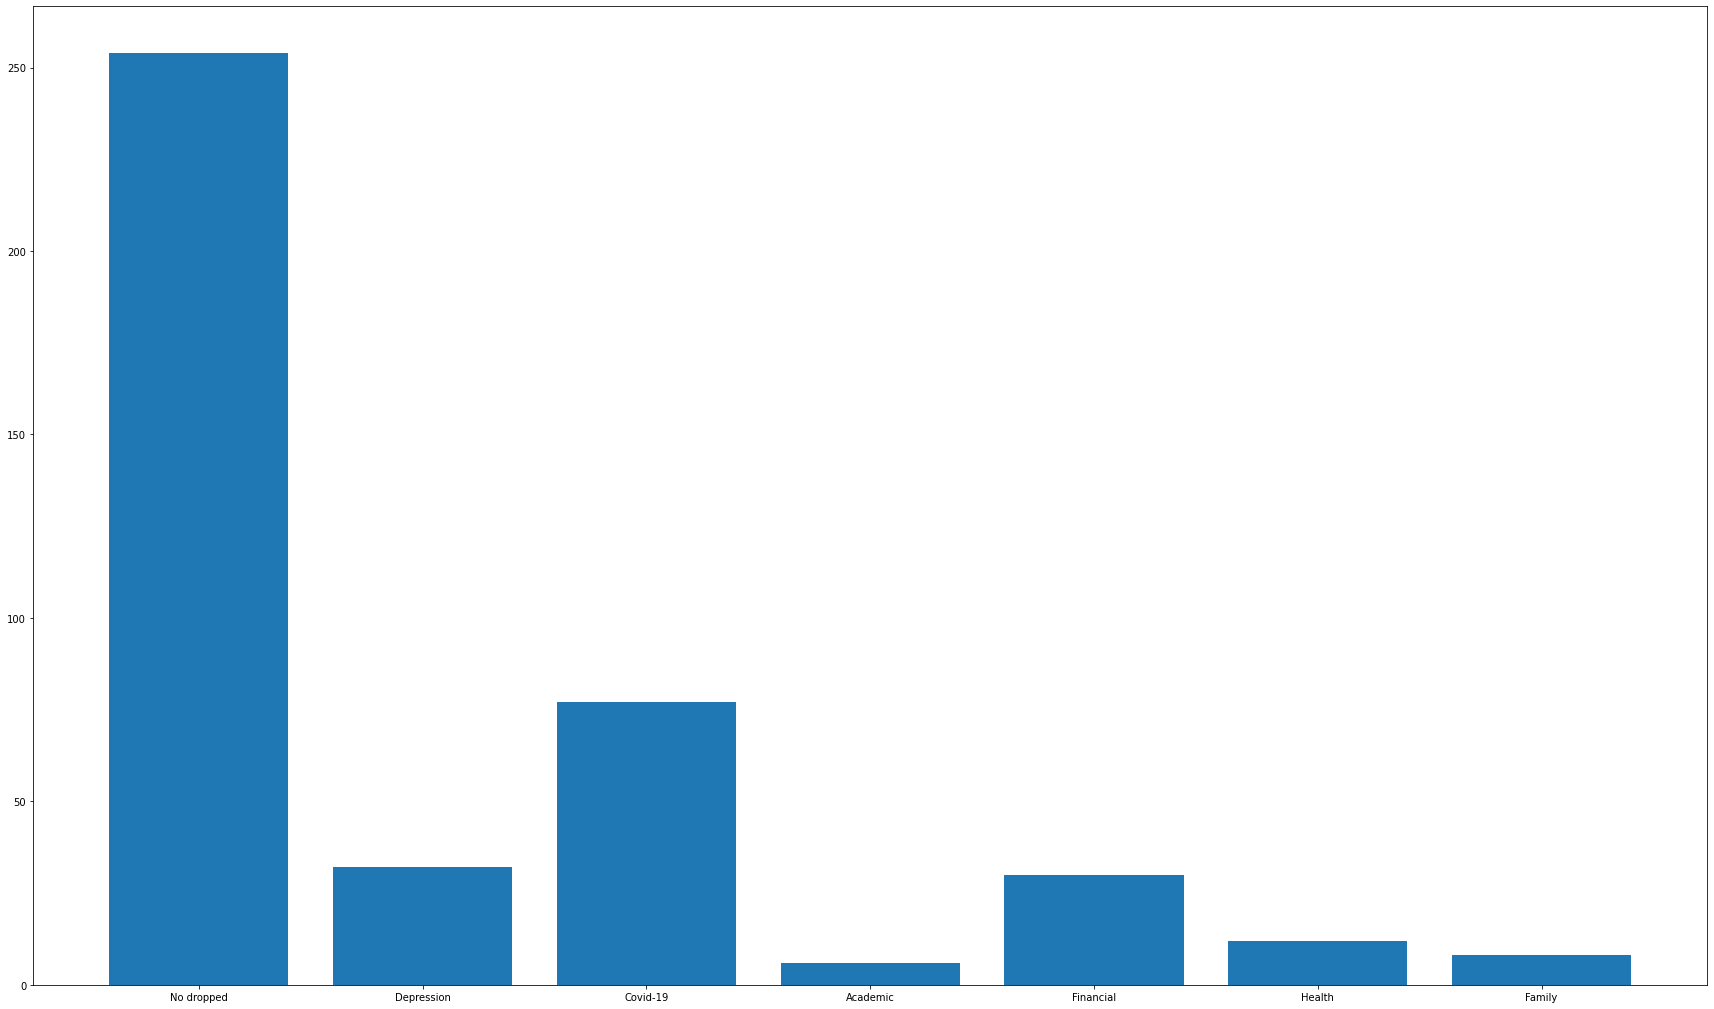

In [37]:
import matplotlib.pyplot as plt
import numpy as np

Reasonlist = data['Reason'].unique()

ReasonList = []
countList=[]

for reason in Reasonlist:
  ReasonList.append(reason)
for reason in Reasonlist:
  count=0
  for d in data['Reason']:
    if reason == d:
      count+=1
  countList.append(count)
x = np.array(ReasonList)
y = np.array(countList)
plt.figure(figsize=(30,18))
plt.bar(x,y)
plt.show()

In [38]:
import matplotlib.pyplot as plt
import numpy as np

dropIncome = []
noDropIncome = []
i=0
for drop in data['Drop_semester']:
  if drop == 'No':
    noDropIncome.append(data['Family_income'][i])
  else:
    dropIncome.append(data['Family_income'][i])
  i= i+1

In [39]:
# drop income list
uniquelist = []
for x in dropIncome:
  if x not in uniquelist:
    uniquelist.append(x)

incomeList = []
countList=[]

for reason in uniquelist:
  incomeList.append(reason)
for income in incomeList:
  count=0
  for d in dropIncome:
    if income == d:
      count+=1
  if count > 0:
    countList.append(count)


j=0
for income in uniquelist:
  print(income+' : '+str(countList[j]))
  j+=1


8000 : 1
80000 : 8
40000 : 10
100000 : 8
30000 : 11
70000 : 5
35000 : 9
20000 : 7
10000 : 5
6000 : 1
15000 : 1
60000 : 6
120000 : 1
90000 : 4
50000 : 17
25000 : 4
300090 : 1
12000 : 1
65000 : 5
300000 : 1
28000 : 1
72000 : 1
200000 : 1
22000 : 1
23444 : 1
75000 : 10
45000 : 6
18000 : 1
85000 : 2
88000 : 5
150000 : 3
87000 : 1
95000 : 1
110000 : 1
56000 : 3
48000 : 2
78000 : 2
74000 : 1
55000 : 3
77000 : 1
144000 : 2
62000 : 2
52000 : 1
175000 : 1
2000 : 2
76000 : 1
68000 : 2
47000 : 1
54000 : 1
44000 : 1
86000 : 2
138000 : 1
52500 : 1
125000 : 1


In [40]:
# no dropped income list
uniquelist = []
for x in noDropIncome:
  if x not in uniquelist:
    uniquelist.append(x)

incomeList = []
countList=[]

for reason in uniquelist:
  incomeList.append(reason)
for income in incomeList:
  count=0
  for d in noDropIncome:
    if income == d:
      count+=1
  if count > 0:
    countList.append(count)

j=0
for income in uniquelist:
  print(income+' : '+str(countList[j]))
  j+=1


50000 : 29
30000 : 24
70000 : 9
40000 : 21
500000 : 2
100000 : 17
45000 : 13
10000 : 3
20000 : 5
80000 : 14
75000 : 8
35000 : 7
66000 : 2
76000 : 1
240000 : 1
60000 : 9
150000 : 4
79000 : 1
25000 : 4
27000 : 1
200000 : 3
65000 : 7
120000 : 3
24000 : 2
42000 : 2
56000 : 2
67888 : 1
90000 : 10
55000 : 10
72000 : 1
48000 : 1
85000 : 5
95000 : 2
78000 : 2
44000 : 1
82000 : 3
77000 : 1
54000 : 2
74000 : 2
58000 : 1
43000 : 1
38000 : 1
46000 : 1
92000 : 1
68000 : 1
39000 : 1
450000 : 2
340000 : 1
560000 : 1
34000 : 1


In [41]:
print(data['Family_income'])

0       50000
1        8000
2       30000
3       30000
4       70000
        ...  
414    100000
415    340000
416    560000
417     45000
418     34000
Name: Family_income, Length: 419, dtype: object


In [42]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               419 non-null    object 
 1   Current_cgpa         419 non-null    float64
 2   University_types     419 non-null    object 
 3   Drop_semester        419 non-null    object 
 4   Reason               419 non-null    object 
 5   Living_area          419 non-null    object 
 6   Family_income        419 non-null    object 
 7   Internet_facilities  419 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 26.3+ KB
None


In [43]:
print(data.describe())

       Current_cgpa  Internet_facilities
count    419.000000           419.000000
mean       3.481874             3.575179
std        0.779180             1.220226
min        0.000000             1.000000
25%        3.310000             3.000000
50%        3.560000             4.000000
75%        3.880000             5.000000
max        9.170000             5.000000


In [44]:
data.isnull().values.any()

False

In [45]:
data.isnull().sum()

Gender                 0
Current_cgpa           0
University_types       0
Drop_semester          0
Reason                 0
Living_area            0
Family_income          0
Internet_facilities    0
dtype: int64

In [46]:
data=data.dropna()

In [47]:
data.isnull().sum()

Gender                 0
Current_cgpa           0
University_types       0
Drop_semester          0
Reason                 0
Living_area            0
Family_income          0
Internet_facilities    0
dtype: int64

In [48]:
data['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
data['University_types'].replace(['Public', 'Private','Others'],[0, 1,2], inplace=True)
data['Drop_semester'].replace(['No', 'Yes'],[0, 1], inplace=True)
data['Living_area'].replace(['Urban', 'Rural'],[0, 1], inplace=True)
data['Reason'].replace(['No dropped','Depression','Health','Family','Financial','Covid-19','Academic'],
                       [0,1,2,3,4,5,6], inplace=True)

In [49]:
print(data['Reason'].value_counts())

0    254
5     77
1     32
4     30
2     12
3      8
6      6
Name: Reason, dtype: int64


In [50]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 418
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               419 non-null    int64  
 1   Current_cgpa         419 non-null    float64
 2   University_types     419 non-null    int64  
 3   Drop_semester        419 non-null    int64  
 4   Reason               419 non-null    int64  
 5   Living_area          419 non-null    int64  
 6   Family_income        419 non-null    object 
 7   Internet_facilities  419 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 29.5+ KB
None


In [51]:
# x = data[['Gender',	'University_types'	,'Reason',	'Living_area'	,'Family_income',	'Internet_facilities']]
x = data[['Gender','Current_cgpa',	'University_types'	,'Reason',	 'Family_income',	'Internet_facilities']]
y = data[	'Drop_semester']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)
print(x['Family_income'])
#model create
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)
#dtree_pred=dtree.predict(x_test)

0       50000
1        8000
2       30000
3       30000
4       70000
        ...  
414    100000
415    340000
416    560000
417     45000
418     34000
Name: Family_income, Length: 419, dtype: object


RandomForestRegressor()

In [52]:
#score of this model
regressor.score(x_test,y_test)

0.9368588034188035

In [53]:
#predict test data
predictions = regressor.predict(x_test).astype('int')
predictions

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,predictions)

0.9880952380952381

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[45,  0],
       [ 1, 38]])

In [57]:
# precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.97      0.99        39

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



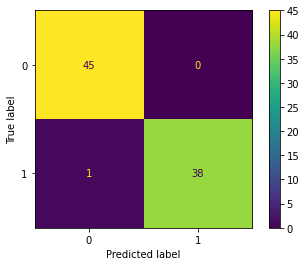

In [58]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,0.9,size = 1000)
predicted = numpy.random.binomial(1,.1,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test,predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

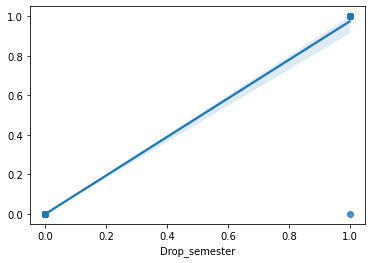

In [59]:
#show predict data into graph
sns.regplot(x=y_test, y=predictions)

In [60]:
#create new padaframe data with Reason,actual drop_semester and predicted Drop_semester
test = pd.DataFrame(columns=['Family_income','Reason','Drop_semester'])
test['Family_income'] = x_test['Family_income']
test['Reason'] = x_test['Reason']
test['Drop_semester']=y_test
test['Predicted_Drop_semester']=predictions
test

,Family_income,Reason,Drop_semester,Predicted_Drop_semester
378,47000,1,1,1
165,30000,0,0,0
17,50000,0,0,0
179,25000,0,0,0
4,70000,0,0,0
...,...,...,...,...
408,120000,0,0,0
250,35000,4,1,1
90,60000,0,0,0
326,55000,0,0,0


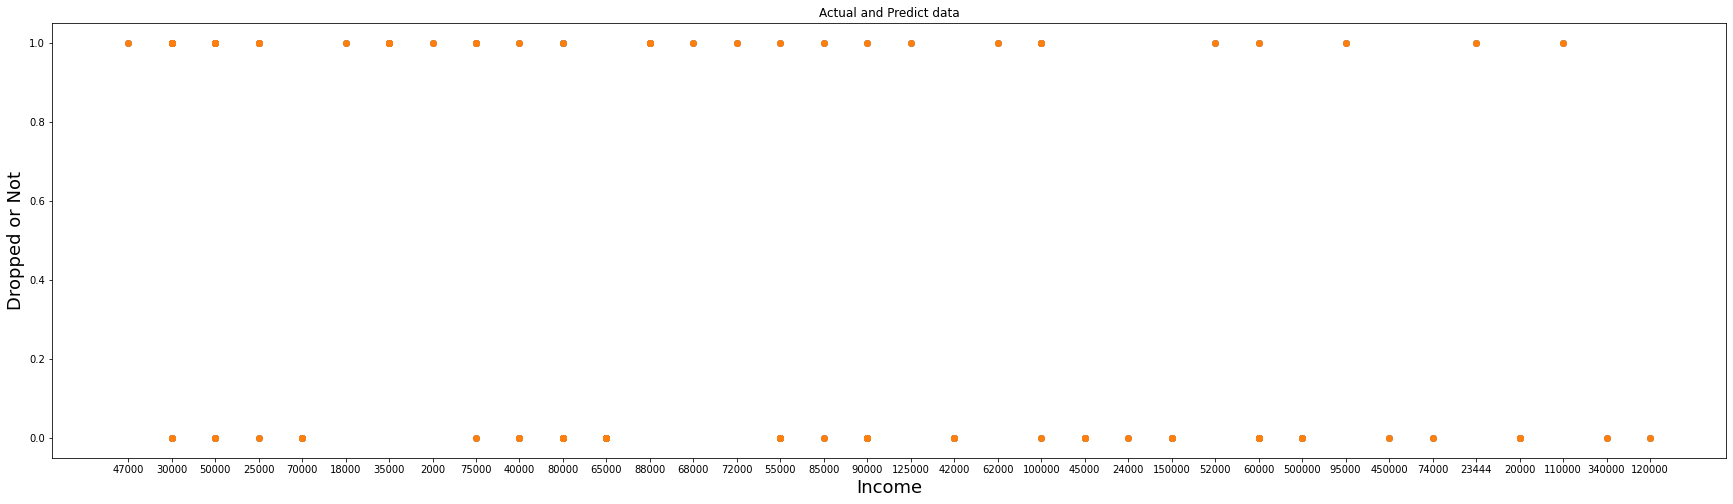

In [61]:
#show graph with actual and predicted price
plt.figure(figsize=(30,8))
plt.title("Actual and Predict data")
plt.xlabel('Income',fontsize=18)
plt.ylabel('Dropped or Not',fontsize=18)
plt.scatter(test['Family_income'],test['Drop_semester'])
plt.scatter(test['Family_income'],test['Predicted_Drop_semester'])
plt.show()

In [62]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, predictions))

0.9880952380952381
